In [105]:
from typing import Any

import pandas as pd
from pandas import DataFrame, Series
from sklearn.linear_model import TweedieRegressor

from src.constants import SEX_HEADER, SURVIVED_HEADER, SEX_ENCODED, AGE_HEADER, PCLASS_HEADER


titanic_training_df: DataFrame = pd.read_csv("../data/train.csv")
titanic_training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# Create feature DataFrame with Sex, Age, and Pclass
feature_df: DataFrame = titanic_training_df[[SURVIVED_HEADER, SEX_HEADER, AGE_HEADER, PCLASS_HEADER]].copy()

# Encode Sex as numeric
feature_df[SEX_ENCODED] = feature_df[SEX_HEADER].map({'male': 0, 'female': 1})

# Fill missing Age values with the median age
feature_df[AGE_HEADER] = feature_df[AGE_HEADER].fillna(feature_df[AGE_HEADER].median())

feature_df.head()

,Survived,Sex,Age,Pclass,Sex_Encoded
0,0,male,22.0,3,0
1,1,female,38.0,1,1
2,1,female,26.0,3,1
3,1,female,35.0,1,1
4,0,male,35.0,3,0


In [107]:
from sklearn import tree

# Train decision tree on Sex, Age, and Pclass
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(
    feature_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]],
    feature_df[SURVIVED_HEADER]
)

# Predict on training data to see the model in action
decisionTree.predict(feature_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

[Text(0.47954601377952755, 0.9705882352941176, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.1655388779527559, 0.9117647058823529, 'x[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.3225424458661417, 0.9411764705882353, 'True  '),
 Text(0.015748031496062992, 0.8529411764705882, 'x[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.007874015748031496, 0.7941176470588235, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.023622047244094488, 0.7941176470588235, 'x[1] <= 0.71\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.015748031496062992, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.031496062992125984, 0.7352941176470589, 'x[1] <= 2.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.015748031496062992, 0.6764705882352942, 'x[1] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.007874015748031496, 0.6176470588235294, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.

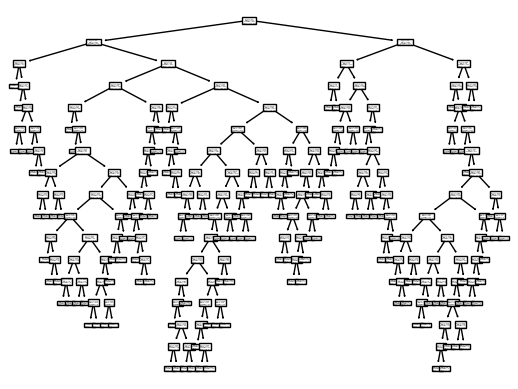

In [108]:
tree.plot_tree(decisionTree)

In [109]:
# Load and preprocess test data
titanic_test_df: DataFrame = pd.read_csv("../data/test.csv")

# Encode Sex
titanic_test_df[SEX_ENCODED] = titanic_test_df[SEX_HEADER].map({'male': 0, 'female': 1})

# Fill missing Age values with the median from training data
titanic_test_df[AGE_HEADER] = titanic_test_df[AGE_HEADER].fillna(feature_df[AGE_HEADER].median())

titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [110]:
# Make predictions using Sex, Age, and Pclass
survivalPrediction = decisionTree.predict(titanic_test_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]])

In [111]:
submission_df = pd.DataFrame({
    'PassengerId': titanic_test_df['PassengerId'],
    'Survived': survivalPrediction
})

submission_df.to_csv('../data/submission.csv', index=False)

submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
